In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def f(t, y):

  return -50 * (y - np.cos(t))

def exact_solution(t):

  return (50/2501) * (50 * np.cos(t) + np.sin(t)) + (1/2501) * np.exp(-50 * t)

In [26]:
def RK4_step(f, t_n, y_n, h):
    """
    A single step of the Rv4 method.
    """
    v1 = h * f(t_n, y_n)
    v2 = h * f(t_n + 0.5 * h, y_n + 0.5 * v1)
    v3 = h * f(t_n + 0.5 * h, y_n + 0.5 * v2)
    v4 = h * f(t_n + h, y_n + v3)
    y_next = y_n + (v1 + 2*v2 + 2*v3 + v4) / 6

    return y_next

def RK4_solve(f, y0, t_start, t_end, h):

    num_steps = int((t_end - t_start) / h)
    t_values = np.linspace(t_start, t_end, num_steps + 1)
    step_size = t_values[1] - t_values[0]
    y_values = np.zeros(num_steps + 1)
    y_values[0] = y0

    for i in range(num_steps):
      y_values[i+1] = RK4_step(f, t_values[i], y_values[i], step_size)

    return t_values, y_values

In [27]:
def trapezoidal_step_linear_ode(t_n, y_n, h, t_next):
    # Linear update of implicit Trapezoidal method
    numerator = y_n * (1 - 25 * h) + 25 * h * (np.cos(t_n) + np.cos(t_next))
    denominator = 1 + 25 * h
    y_next = numerator / denominator
    return y_next

def trapezoidal_solve(y0, t_start, t_end, h):

    num_steps = int((t_end - t_start) / h)
    t_values = np.linspace(t_start, t_end, num_steps + 1)
    step_size = t_values[1] - t_values[0]
    y_values = np.zeros(num_steps + 1)
    y_values[0] = y0

    for i in range(num_steps):
        t_n = t_values[i]
        y_n = y_values[i]
        t_next = t_values[i+1]
        y_values[i+1] = trapezoidal_step_linear_ode(t_n, y_n, step_size, t_next)

    return t_values, y_values

In [28]:
y0 = 1.0
t_start = 0.0
t_end = 1.0
h = 0.05

RK4_t, RK4_y = RK4_solve(f, y0, t_start, t_end, h)
trapezoidal_t, trapezoidal_y = trapezoidal_solve(y0, t_start, t_end, h)

exact = exact_solution(RK4_t)

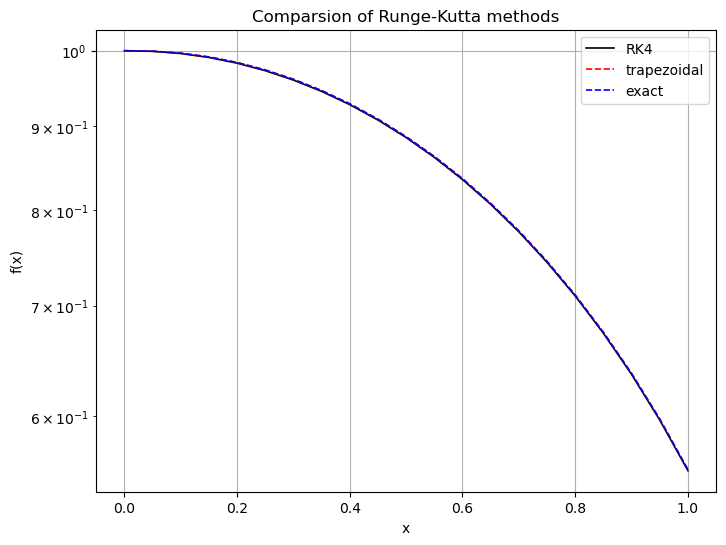

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(RK4_t, RK4_y, 'k-', label='RK4', linewidth=1.2)
plt.plot(trapezoidal_t, trapezoidal_y, 'r--', label='trapezoidal', linewidth=1.2)
plt.plot(RK4_t, exact, 'b--', label='exact', linewidth=1.2)

plt.title("Comparsion of Runge-Kutta methods")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
RK4_abs_err = abs(exact[-1] - RK4_y[-1])
trapezoidal_abs_err = abs(exact[-1] - trapezoidal_y[-1])
print('Final absolute error of RK4: ', RK4_abs_err)
print('Final absolute error of trapezoidal: ', trapezoidal_abs_err)

Final absolute error of RK4:  0.0007555804687233714
Final absolute error of trapezoidal:  3.4127891286317436e-06


The trapezoidal method performs significant better than RK4 method, though in general they both give precise approximation. The reason why RK4 is less precise is the choice of step size for the stiff ODE. The ODE has a fast decaying stiff component with $\lambda=-50$. Here $hz=-2.5$ is close to the stability requirement -2.78, so the precision is affected, fast decaying mode is not fast enough. However, trapezoidal method is A-stable. Its highly stiff components is damping faster in this case than RK4.